In [1]:
import pandas as pd

test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

# Generate Image from data

In [2]:
from PIL import Image
import numpy as np
import math

width = int(math.sqrt(len(test.columns)))
height = width

def generate_random_number_image(index: int, dataset=test, flash: bool=False) -> Image:
    data = dataset.iloc[index]
    arr = np.array(data, dtype=np.uint8).reshape(width, height)
    
    image = Image.fromarray(arr, 'L')
    image = image.resize((225, 225), Image.Resampling.LANCZOS)
    return image


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_Y = train.label
train_X = train.drop("label", axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

### Sklearn DecisionTreeRegressor

In [4]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=0)
model_tree.fit(train_X, train_Y)

prediction = model_tree.predict(test_X)
mean_absolute_error(prediction, test_Y)


0.5698809523809524

### RandomForestRegressor

In [6]:
# from sklearn.ensemble import RandomForestRegressor
# 
# model_forest = RandomForestRegressor(random_state=0)
# model_forest.fit(train_X, train_Y)
# 
# prediction = model_forest.predict(test_X)
# mean_absolute_error(prediction, test_Y)

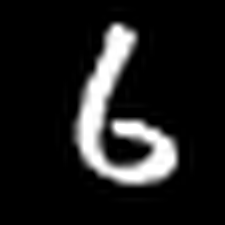

In [9]:
import random
random_num = random.randint(0, 30_000-1)
generate_random_number_image(index=random_num, flash=False)

In [10]:
model_tree.predict(test.iloc[random_num:random_num+1])

array([6.])

In [25]:
prediction = model_tree.predict(test)


solution = pd.DataFrame({'ImageID': prediction, 'Label': list(range(1, len(prediction)))})

print(solution)
# print(np.arra
# y([range(1, len(prediction) + 1))

ValueError: All arrays must be of the same length